b'y=mx+c'
b'm:' 0.982083
b'c:' 2.80834
b'Actual values of Y' [ 14.39000034  24.87000084  36.34000015  45.99000168]
b'predicted values of Y' [ 14.8388567   24.73824883  35.33492279  46.67797852]
0.652366


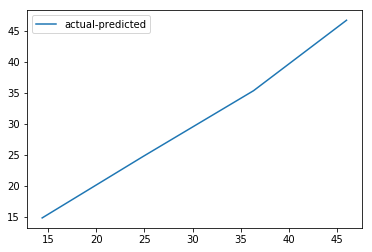

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

x=tf.constant([12.25,22.33,33.12,44.67],name='f')
y=tf.constant([14.39,24.87,36.34,45.99],name='s')

e=tf.constant("y=mx+c")
ms=tf.constant("m:")
mc=tf.constant("c:")
ac=tf.constant("Actual values of Y")
pc=tf.constant("predicted values of Y")

# MEAN OF X, Y
mx = tf.reduce_mean(x)
my = tf.reduce_mean(y)

    
# X-MEAN , Y-MEAN
vx=tf.Variable(x-mx, name='varx')
vy=tf.Variable(y-my, name='vary')

   
#VS=X-MEAN SQUARE, SUM OF VS
vs=tf.square(vx)
sm=tf.reduce_sum(vs)

    
#COVARIENCE  OF X,Y
cV=tf.multiply(vx,vy)
cm=tf.reduce_sum(cV)

#calculation of m and c
m=tf.divide(cm,sm)
c=my-(mx*m)

#Predicted values of Y
p=tf.multiply(x,m)
pry=tf.add(p,c)     


#calculating root-mean-square-error
rms=tf.sqrt(tf.reduce_mean(tf.squared_difference(y,pry)))
    
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
 
print(sess.run(e))
print(sess.run(ms),sess.run(m))
print(sess.run(mc),sess.run(c))

print(sess.run(ac),sess.run(y))
print(sess.run(pc),sess.run(pry))
print(sess.run(rms))

plt.plot(sess.run(y),sess.run(pry),label='actual-predicted')
plt.legend()
plt.show()

    

In [6]:
import tensorflow as tf
import numpy as np

def body(x):
    a = tf.random_uniform(shape=[2, 2], dtype=tf.int32, maxval=100)
    b = tf.constant(np.array([[1, 2], [3, 4]]), dtype=tf.int32)
    c = a + b
    return tf.nn.relu(x + c)

def condition(x):
    return tf.reduce_sum(x) < 100

x = tf.Variable(tf.constant(0, shape=[2, 2]))
print(x)
with tf.Session():
    tf.initialize_all_variables().run()
    result = tf.while_loop(condition, body, [x])
    print(result.eval())
    




<tf.Variable 'Variable_3:0' shape=(2, 2) dtype=int32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
[[68 85]
 [17 18]]
